In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0005
num_classes = 2
model_name = "convnext_tiny"
output_dir = "outputs/models/augmented"
metrics_output_dir = "outputs/plots/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-25 14:59:56,719 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-25 14:59:56,720 - INFO - Applying selected augmentations for wildfire scenarios.
2024-12-25 14:59:56,728 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 14:59:56,730 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 14:59:56,733 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 14:59:56,734 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 14:59:56,735 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 14:59:56,735 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 14:59:56,737 - INFO - Class 'fire' has 730 samples.
2024-12-25 14:59:56,739 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 14:59:56,740 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 

[INFO] Loading augmented datasets...


2024-12-25 15:00:04,736 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: convnext_tiny with Augmented Data

[INFO] Initializing convnext_tiny model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

import time

# Start the timer
start_time = time.time()
print("Training started...")


print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler, 
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}.pth"),
    early_stop_patience=14,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8809
Epoch [1]: Train Loss: 0.5806, Train Acc: 0.7647 | Val Loss: 0.4944, Val Acc: 0.8433, Val Recall: 0.9472, Val F1: 0.8809


[INFO] Learning rate adjusted to: 0.000500
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [2]: Train Loss: 0.4585, Train Acc: 0.8272 | Val Loss: 0.4189, Val Acc: 0.8408, Val Recall: 0.9268, Val F1: 0.8769


[INFO] Learning rate adjusted to: 0.000500
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [3]: Train Loss: 0.4121, Train Acc: 0.8394 | Val Loss: 0.3860, Val Acc: 0.8433, Val Recall: 0.9228, Val F1: 0.8781


[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8846
Epoch [4]: Train Loss: 0.3834, Train Acc: 0.8564 | Val Loss: 0.3652, Val Acc: 0.8507, Val Recall: 0.9350, Val F1: 0.8846


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8907
Epoch [5]: Train Loss: 0.3699, Train Acc: 0.8548 | Val Loss: 0.3473, Val Acc: 0.8632, Val Recall: 0.9106, Val F1: 0.8907


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8937
Epoch [6]: Train Loss: 0.3526, Train Acc: 0.8601 | Val Loss: 0.3378, Val Acc: 0.8657, Val Recall: 0.9228, Val F1: 0.8937


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8941
Epoch [7]: Train Loss: 0.3579, Train Acc: 0.8495 | Val Loss: 0.3399, Val Acc: 0.8657, Val Recall: 0.9268, Val F1: 0.8941


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8994
Epoch [8]: Train Loss: 0.3349, Train Acc: 0.8744 | Val Loss: 0.3269, Val Acc: 0.8731, Val Recall: 0.9268, Val F1: 0.8994


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [9]: Train Loss: 0.3534, Train Acc: 0.8559 | Val Loss: 0.3288, Val Acc: 0.8632, Val Recall: 0.9106, Val F1: 0.8907


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [10]: Train Loss: 0.3406, Train Acc: 0.8654 | Val Loss: 0.3237, Val Acc: 0.8682, Val Recall: 0.9350, Val F1: 0.8967


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [11]: Train Loss: 0.3390, Train Acc: 0.8548 | Val Loss: 0.3249, Val Acc: 0.8731, Val Recall: 0.9187, Val F1: 0.8986


[INFO] Learning rate adjusted to: 0.000125
[INFO] Best model saved with val_f1: 0.9008
Epoch [12]: Train Loss: 0.3410, Train Acc: 0.8532 | Val Loss: 0.3219, Val Acc: 0.8756, Val Recall: 0.9228, Val F1: 0.9008


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [13]: Train Loss: 0.3321, Train Acc: 0.8622 | Val Loss: 0.3157, Val Acc: 0.8731, Val Recall: 0.9187, Val F1: 0.8986


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [14]: Train Loss: 0.3235, Train Acc: 0.8691 | Val Loss: 0.3162, Val Acc: 0.8706, Val Recall: 0.9268, Val F1: 0.8976


[INFO] Learning rate adjusted to: 0.000063
[INFO] Best model saved with val_f1: 0.9155
Epoch [15]: Train Loss: 0.3387, Train Acc: 0.8601 | Val Loss: 0.3064, Val Acc: 0.8930, Val Recall: 0.9472, Val F1: 0.9155


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [16]: Train Loss: 0.3234, Train Acc: 0.8670 | Val Loss: 0.3200, Val Acc: 0.8806, Val Recall: 0.9309, Val F1: 0.9051


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [17]: Train Loss: 0.3201, Train Acc: 0.8771 | Val Loss: 0.3118, Val Acc: 0.8831, Val Recall: 0.9390, Val F1: 0.9077


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [18]: Train Loss: 0.3229, Train Acc: 0.8665 | Val Loss: 0.3164, Val Acc: 0.8831, Val Recall: 0.9472, Val F1: 0.9084


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [19]: Train Loss: 0.3336, Train Acc: 0.8627 | Val Loss: 0.3149, Val Acc: 0.8607, Val Recall: 0.9065, Val F1: 0.8884


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [20]: Train Loss: 0.3231, Train Acc: 0.8569 | Val Loss: 0.3112, Val Acc: 0.8706, Val Recall: 0.9350, Val F1: 0.8984


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [21]: Train Loss: 0.3293, Train Acc: 0.8659 | Val Loss: 0.3060, Val Acc: 0.8731, Val Recall: 0.9390, Val F1: 0.9006


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [22]: Train Loss: 0.3189, Train Acc: 0.8696 | Val Loss: 0.3141, Val Acc: 0.8781, Val Recall: 0.9268, Val F1: 0.9030


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [23]: Train Loss: 0.3103, Train Acc: 0.8771 | Val Loss: 0.3081, Val Acc: 0.8781, Val Recall: 0.9309, Val F1: 0.9034


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [24]: Train Loss: 0.3238, Train Acc: 0.8659 | Val Loss: 0.3080, Val Acc: 0.8831, Val Recall: 0.9390, Val F1: 0.9077


[INFO] Learning rate adjusted to: 0.000016
[INFO] No improvement in val_f1. Patience: 10/14
Epoch [25]: Train Loss: 0.3186, Train Acc: 0.8718 | Val Loss: 0.3116, Val Acc: 0.8682, Val Recall: 0.9228, Val F1: 0.8955


[INFO] Learning rate adjusted to: 0.000016
[INFO] No improvement in val_f1. Patience: 11/14
Epoch [26]: Train Loss: 0.3136, Train Acc: 0.8691 | Val Loss: 0.3044, Val Acc: 0.8856, Val Recall: 0.9472, Val F1: 0.9102


[INFO] Learning rate adjusted to: 0.000016
[INFO] No improvement in val_f1. Patience: 12/14
Epoch [27]: Train Loss: 0.3181, Train Acc: 0.8712 | Val Loss: 0.3082, Val Acc: 0.8706, Val Recall: 0.9228, Val F1: 0.8972


[INFO] Learning rate adjusted to: 0.000016
[INFO] No improvement in val_f1. Patience: 13/14
Epoch [28]: Train Loss: 0.3292, Train Acc: 0.8622 | Val Loss: 0.3117, Val Acc: 0.8856, Val Recall: 0.9350, Val F1: 0.9091


[INFO] Learning rate adjusted to: 0.000016
[INFO] No improvement in val_f1. Patience: 14/14
Epoch [29]: Train Loss: 0.3301, Train Acc: 0.8638 | Val Loss: 0.3104, Val Acc: 0.8806, Val Recall: 0.9268, Val F1: 0.9048
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 29 epochs. Best val_f1: 0.9155

[INFO] Training completed successfully!
Training completed in 0 hours, 7 minutes, and 33 seconds.


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name=model_name,
    save_base_path=metrics_output_dir + f"/{model_name}_augmented"
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/augmented/convnext_tiny_augmented\convnext_tiny\convnext_tiny_evaluation.json

[INFO] Metrics for convnext_tiny with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.8509316770186336, 'recall': 0.8616352201257862, 'f1-score': 0.85625, 'support': 159.0}, 'Fire': {'precision': 0.9116465863453815, 'recall': 0.9043824701195219, 'f1-score': 0.908, 'support': 251.0}, 'accuracy': 0.8878048780487805, 'macro avg': {'precision': 0.8812891316820075, 'recall': 0.8830088451226541, 'f1-score': 0.882125, 'support': 410.0}, 'weighted avg': {'precision': 0.8881010483381793, 'recall': 0.8878048780487805, 'f1-score': 0.8879310975609755, 'support': 410.0}}, 'confusion_matrix': [[137, 22], [24, 227]], 'roc_auc': 0.9528176601769024, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/plots/augmented\convnext_tiny_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/augmented\convnext_tiny_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/plots/augmented\convnext_tiny_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/plots/augmented\convnext_tiny_augmented_precision_recall.png
[INFO] All results saved successfully!


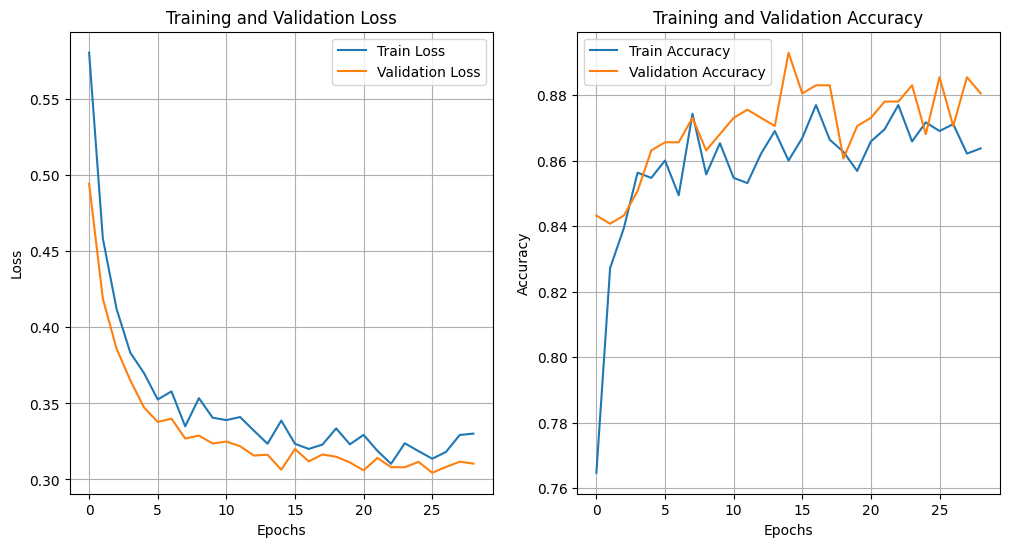

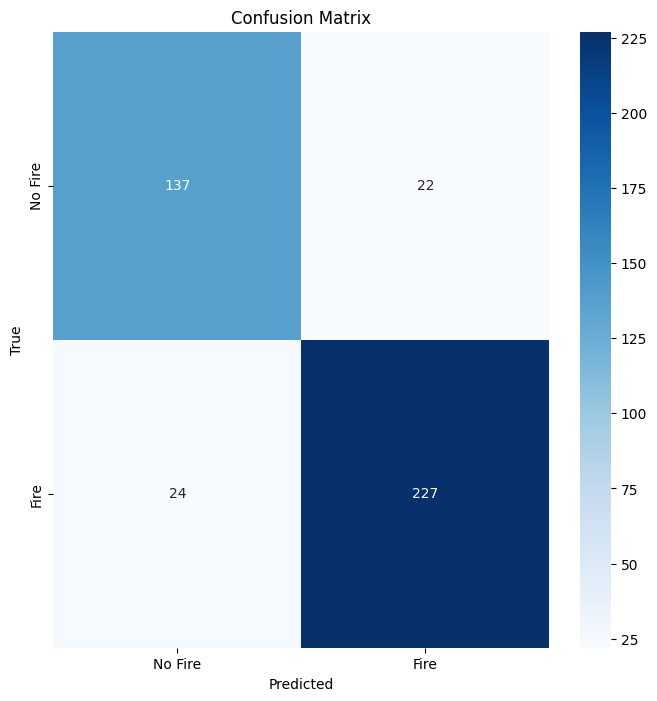

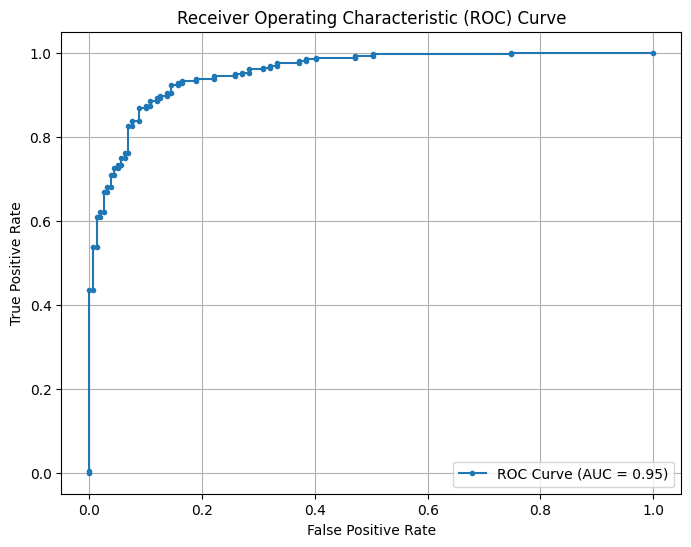

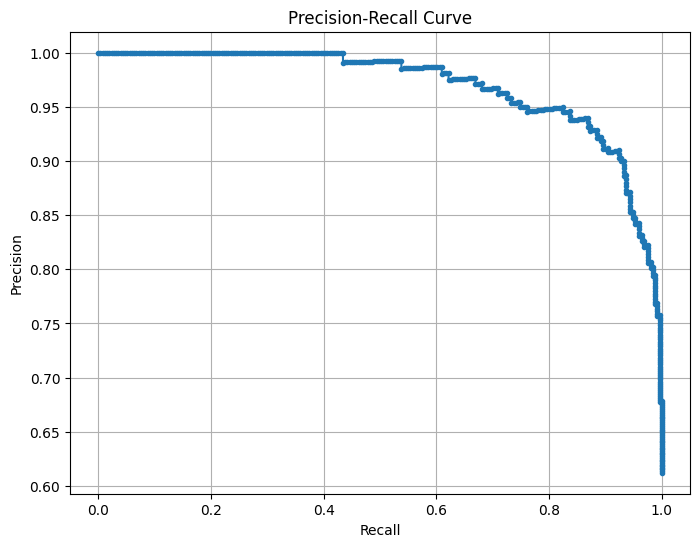

: 

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")